In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd

In [5]:
base_path = '/users/markusk/git/nettiauto/data'
#model_folder = 'tesla/modely'
model_folder = 'tesla/model3'
#model_folder = 'polestar/2'
#model_folder = 'hyundai/ioniq5'
#model_folder = 'porsche/taycan'
#model_folder = 'ford/mache'
#model_folder = 'kia/ev6'

In [6]:
all_files = glob.glob(os.path.join(base_path, model_folder , '*.csv'))
all_files

['/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230120T174734.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230105T182327.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230102T204749.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20221221T104859.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230115T210118.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230128T113432.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230112T124947.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230101T183233.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230212T185614.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20221214T184331.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230109T220251.csv',
 '/users/markusk/git/nettiauto/data/tesla/model3/tesla_model3_20230113T14482

In [7]:
raw_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [8]:
raw_df = raw_df.drop(raw_df[raw_df.car_price == 0].index)


In [9]:
raw_df

,car_id,car_manufacturer,car_model,car_price,car_year,car_mileage,seller,short_description,nettiauto_url,timestamp
0,13149362,Tesla,Model 3,35900,2020,86000,Car Cloud Oy,Model 3 Standard Range+ *VARATTU!* *1omistaja ...,https://www.nettiauto.com/tesla/model-3/13149362,2023-01-20 17:47:34.015658
1,13335064,Tesla,Model 3,35990,2019,213000,Autolle.com Tuusula,Akku 75kWh Long Range Dual Motor AWD 475hv | A...,https://www.nettiauto.com/tesla/model-3/13335064,2023-01-20 17:47:34.015658
2,13335979,Tesla,Model 3,35990,2019,103000,Autolle.com Vantaa,| 55kwh Standard Range plus | EAP | NAHKASISUS...,https://www.nettiauto.com/tesla/model-3/13335979,2023-01-20 17:47:34.015658
3,13113892,Tesla,Model 3,36880,2020,81000,Saka Finland Oy Lahti,Standard Range Plus ** 1.OM Suomi-Auto / AP 2....,https://www.nettiauto.com/tesla/model-3/13113892,2023-01-20 17:47:34.015658
4,13361976,Tesla,Model 3,36980,2020,34000,Private seller,"*VARATTU* SR+, 2V takuu, Suomiauto",https://www.nettiauto.com/tesla/model-3/13361976,2023-01-20 17:47:34.015658
...,...,...,...,...,...,...,...,...,...,...
9862,13188958,Tesla,Model 3,62850,2022,7900,TKC-Automyynti,"Performance Dual Motor AWD Refresh-2, Ledit, N...",https://www.nettiauto.com/tesla/model-3/13188958,2023-02-23 19:09:14.027638
9863,13357935,Tesla,Model 3,64900,2021,26000,Private seller,Manhart Performance 720,https://www.nettiauto.com/tesla/model-3/13357935,2023-02-23 19:09:14.027638
9864,13231076,Tesla,Model 3,66880,2022,8000,TKC-Automyynti,"Performance Dual Motor AWD Refresh-2, Ledit, N...",https://www.nettiauto.com/tesla/model-3/13231076,2023-02-23 19:09:14.027638
9866,13398864,Tesla,Model 3,49499,2021,13000,Private seller,Performance AWD Face-Lift White Seats,https://www.nettiauto.com/tesla/model-3/13398864,2023-02-23 19:09:14.027638


In [10]:
agg_df = raw_df.groupby(['car_manufacturer', 'car_model', 'timestamp'], as_index=False).agg(
            min_price = ('car_price', 'min'),
            max_price = ('car_price', 'max'),
            mean_price = ('car_price', 'mean'),
            median_price = ('car_price', 'median'),
            count = ('car_price', 'count'))

agg_df['time'] = agg_df['timestamp'].str[:10]
agg_df = agg_df.drop(columns=['timestamp'])

#agg_df['time'] = agg_df['timestamp'].dt.date()


agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_manufacturer  19 non-null     object 
 1   car_model         19 non-null     object 
 2   min_price         19 non-null     int64  
 3   max_price         19 non-null     int64  
 4   mean_price        19 non-null     float64
 5   median_price      19 non-null     float64
 6   count             19 non-null     int64  
 7   time              19 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 1.3+ KB


In [11]:
agg_df

,car_manufacturer,car_model,min_price,max_price,mean_price,median_price,count,time
0,Tesla,Model 3,36890,66880,52388.066550,51980.0,571,2022-12-07
1,Tesla,Model 3,38990,66880,52191.422261,51645.0,566,2022-12-11
2,Tesla,Model 3,38990,66880,51838.716783,51000.0,572,2022-12-14
3,Tesla,Model 3,38990,67000,51654.121575,50245.0,584,2022-12-18
4,Tesla,Model 3,38800,67000,51531.755556,49990.0,585,2022-12-21
5,Tesla,Model 3,38990,67000,51274.433506,49900.0,579,2022-12-27
6,Tesla,Model 3,38490,67000,50966.260223,49890.0,538,2023-01-01
7,Tesla,Model 3,38490,67000,50969.810409,49895.0,538,2023-01-02
8,Tesla,Model 3,37990,67000,50731.730697,49850.0,531,2023-01-05
9,Tesla,Model 3,37990,67000,50607.841905,49490.0,525,2023-01-09


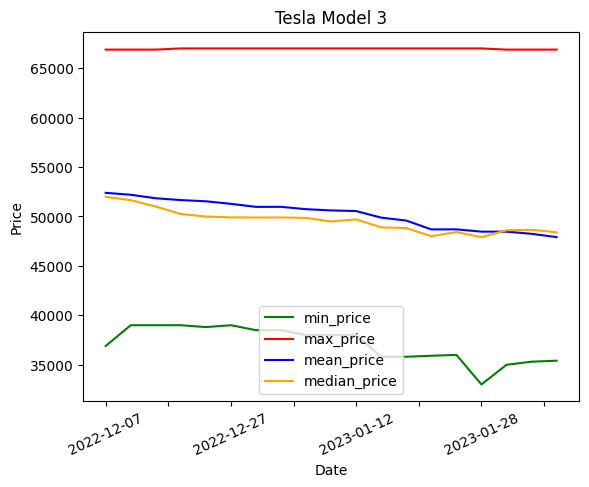

In [12]:
ax = plt.gca()
#ax2 = ax.twinx()

agg_df.plot(kind='line', x='time', y='min_price', color='green',ax=ax)
agg_df.plot(kind='line', x='time', y='max_price', color='red', ax=ax)
agg_df.plot(kind='line', x='time', y='mean_price', color='blue', ax=ax)
agg_df.plot(kind='line', x='time', y='median_price', color='orange', ax=ax)
#agg_df.plot(kind='scatter', x='timestamp', y='count', color='black', ax=ax2)

plt.title(f"{agg_df['car_manufacturer'].iloc[0]} {agg_df['car_model'].iloc[0]}")
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 25)

plt.show()

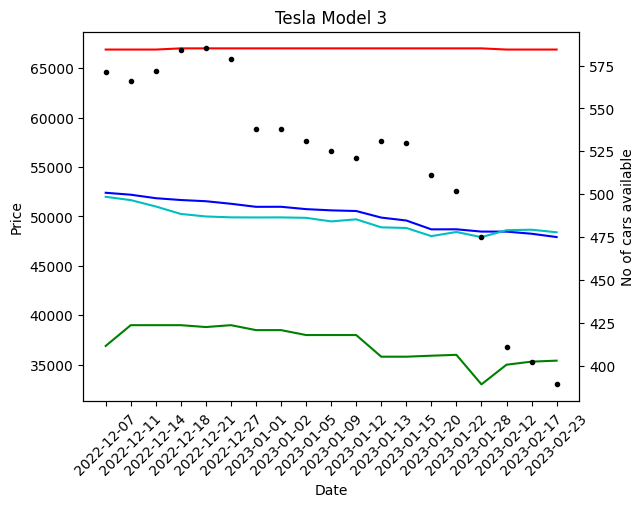

In [18]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(agg_df['time'], agg_df['min_price'], '-g')
ax1.plot(agg_df['time'], agg_df['max_price'], '-r')
ax1.plot(agg_df['time'], agg_df['mean_price'], '-b')
ax1.plot(agg_df['time'], agg_df['median_price'], '-c')

ax2.plot(agg_df['time'], agg_df['count'], '.k')

plt.title(f"{agg_df['car_manufacturer'].iloc[0]} {agg_df['car_model'].iloc[0]}")

ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('No of cars available')

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

plt.show()

In [14]:
raw_df[raw_df['car_id'] == 13215582].sort_values(by=['timestamp'])

,car_id,car_manufacturer,car_model,car_price,car_year,car_mileage,seller,short_description,nettiauto_url,timestamp
9267,13215582,Tesla,Model 3,54900,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2022-12-07 20:39:45.429704
7034,13215582,Tesla,Model 3,54900,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2022-12-11 11:45:01.292982
4993,13215582,Tesla,Model 3,53900,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2022-12-14 18:43:31.517832
7599,13215582,Tesla,Model 3,53900,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2022-12-18 10:12:49.036177
1924,13215582,Tesla,Model 3,52900,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2022-12-21 10:48:59.186889
8174,13215582,Tesla,Model 3,52900,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2022-12-27 13:43:40.405753
4021,13215582,Tesla,Model 3,52900,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2023-01-01 18:32:33.001878
1370,13215582,Tesla,Model 3,52900,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2023-01-02 20:47:49.465400
809,13215582,Tesla,Model 3,51760,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2023-01-05 18:23:27.589235
5517,13215582,Tesla,Model 3,51760,2021,12000,Vaihtoplus,Long Range AWD *Ilmalämpöpumppu / Kattoluukku ...,https://www.nettiauto.com/tesla/model-3/13215582,2023-01-09 22:02:51.617337
